In [3]:
# Necessary import statements:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Percentage of People Looking For New Job

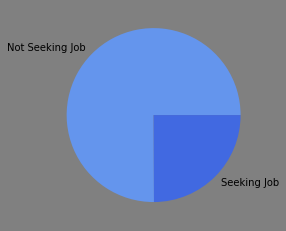

In [5]:
data = df['target'].value_counts()
colors = ['cornflowerblue', 'royalblue', 'lightsteelblue']
labels = ['Not Seeking Job', 'Seeking Job']

# Plot results:
plt.figure('Ratio of People Seeking New Job', figsize=(4,4), facecolor='grey')
plt.pie(labels=labels, x=data, colors=colors)
plt.show()

There is around 25 percent of people seeking a new job which means that this data will be unbalanced.

# Missing Values

In [13]:
print(df.isna().sum() )

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


Here we can see that gender, enrolled_universtiy, education_level, major_discipline, experience, company_size, comapny_type, and last_new_job have missing data. This will have to be dealt with when we implement the machine learning model in the scripts CleanData.py file. For now we will just remark its influence in that data set.

# Enrollee ID

Since Enrollee ID is just a unique identifier for each person it will have to impact on the model. This column can be removed when it comes time to making the machine learning model.

# City

In [5]:
# How many cities are in the data set:
unique_cities = df['city'].nunique()
print("Number of unique cities is:", unique_cities)
print("percentage of unique cities in proportion to total people in data is:", (unique_cities/len(df))*100, "percent.")

Number of unique cities is: 123
percentage of unique cities in proportion to total people in data is: 0.6420294393986846 percent.


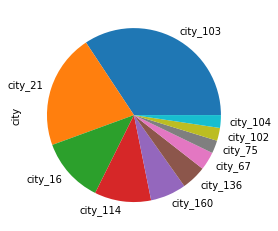

In [16]:
# Population per City for top 10 cities:
df['city'].value_counts()[:10].plot(kind='pie')

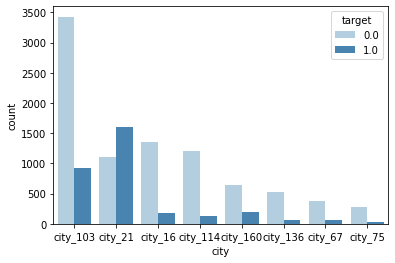

In [20]:
sns.countplot(data=df, x = 'city', hue='target', palette='Blues', order=df.city.value_counts().iloc[:8].index)

Analysis of City Feature:
We can see that each of the top 10 populated cities of the data set have different proprtions of people seeking(1.0) versus not seeking(0.0) a new job. It is very likely that this feature will be very important when it comes to training the model as it is very distinguishing and the city where you come from can help determine if one seeks a new job.

# City Development Index Feature Importance

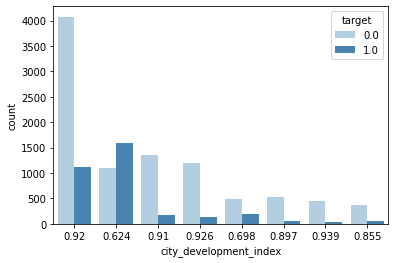

In [23]:
sns.countplot(data=df, x = 'city_development_index', hue='target', palette='Blues', order=df.city_development_index.value_counts().iloc[:8].index)

We can see that each city index even if this is just the top 10 most frequent are each very unique from one another. Due to this, I believe that this feature will be very influential for the model training.

# Gender

###Men Vs. Women Seeking Job

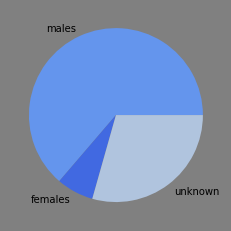

In [5]:
# Males Desired:
males = df[df["gender"] == 'Male']
desired_males = males[males["target"] == 1.0]
num_desired_males = desired_males.shape[0]

# Females Desired:
females = df[df["gender"] == 'Female']
desired_females = females[females["target"] == 1.0]
num_desired_females = desired_females.shape[0]

# Unknown Genders Desired:
unknown_gender = df[df["gender"].isnull()]
desired_unknown_genders = unknown_gender[unknown_gender["target"] == 1.0]
num_desired_unknown_genders = desired_unknown_genders.shape[0]

# Results:
genders = ['males', 'females', 'unknown']
colors = ['cornflowerblue', 'royalblue', 'lightsteelblue']
desired_genders = [num_desired_males, num_desired_females, num_desired_unknown_genders]

# Plot results:
plt.figure('Ratio of Genders Desired By Recruiters', figsize=(4,4), facecolor='grey')
plt.pie(labels=genders, x=desired_genders, colors=colors)
plt.show()

### Proportion of Men Seeking Job versus Man Not Seeking Job



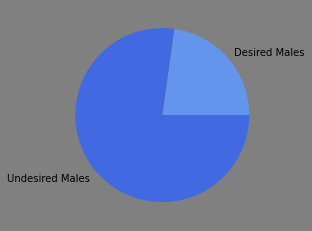

In [6]:
males = df[df["gender"] == 'Male']

# Males Desired:
desired_males = males[males["target"] == 1.0]
num_desired_males = desired_males.shape[0]

# Males Not Desired:
undesired_males = males[males["target"] == 0.0]
num_undesired_males = undesired_males.shape[0]

# Results
data = [num_desired_males, num_undesired_males]
labels = ['Males Seeking Job', 'Males Not Seeking Job']
colors = ['cornflowerblue', 'royalblue']

# Plot results:
plt.figure('Ratio of Men Desired to Women Men', figsize=(4,4), facecolor='grey')
plt.pie(x=data, labels=labels, colors=colors)
plt.show()

### Proportion of Woman Seeking Job versus Woman Not Seeking Job 


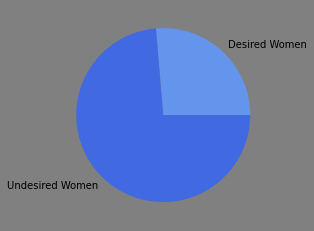

In [7]:
women = df[df["gender"] == 'Female']

# Women Desired:
desired_women = women[women["target"] == 1.0]
num_desired_women = desired_women.shape[0]

# Women Not Desired:
undesired_women = women[women["target"] == 0.0]
num_undesired_women = undesired_women.shape[0]

# Results
data = [num_desired_women, num_undesired_women]
labels = ['Women Seeking Job', 'Women Not Seeking Job']
colors = ['cornflowerblue', 'royalblue']

# Plot results:
plt.figure('Ratio of Women Desired to Women Undesired', figsize=(4,4), facecolor='grey')
plt.pie(x=data, labels=labels, colors=colors)
plt.show()

### Analysis Of Male Vs. Female Data

There are many more men labelled in the data compared to woman, but the percentage of men seeking jobs and women seeking jobs are very similar when compared to their respective gender. This could mean that the data here is not as important for the model as it does not show that being a male or female makes one more likely to leave their job.

# Relevant Experience

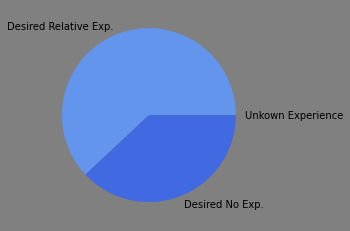

In [8]:
# People with Relative Experience:
rel_exp = df[df["relevent_experience"] == 'Has relevent experience']
desired_rel_exp = rel_exp[rel_exp["target"] == 1.0]
num_desired_rel_exp = desired_rel_exp.shape[0]

# People without Relative Experience:
no_exp = df[df["relevent_experience"] == 'No relevent experience']
desired_no_exp = no_exp[no_exp["target"] == 1.0]
num_desired_no_exp = desired_no_exp.shape[0]

# Unknown Experience:
unknown_exp = df[df["relevent_experience"].isnull()]
desired_unknown_exp = unknown_exp[unknown_exp["target"] == 1.0]
num_desired_unknown_exp = desired_unknown_exp.shape[0]

# Results
data = [num_desired_rel_exp, num_desired_no_exp, num_desired_unknown_exp]
labels = ['Seeking Job W/ Exp.', 'Seeking Job w/o Exp.', 'Unkown Experience']
colors = ['cornflowerblue', 'royalblue', 'lightsteelblue']

# Plot results:
plt.figure('Ratio of People Desired with Relative Experience vs. No Relative Experience', figsize=(4,4), facecolor='grey')
plt.pie(x=data, labels=labels, colors=colors)
plt.show()


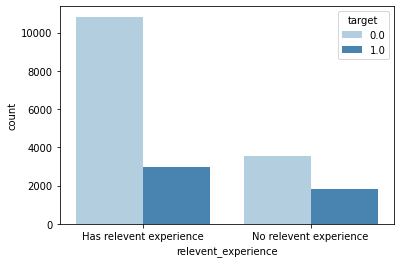

In [30]:
# Relative Experience to Target Values
sns.countplot(data=df, x = 'relevent_experience', hue='target', palette='Blues')

Analysis:
We can see here that both have more people that are not seeking a new job. However, the proportion of people wanting a new job with relevant experience is about %25 while no experience is about %50. With that info, it could mean that people with no experience are more likely to want a new job, so this feature may be of some importantce when training the moedl.

# Enrolled in University

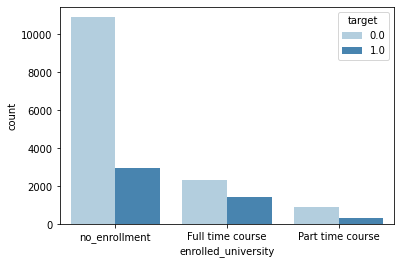

In [29]:
# Relative Experience to Target Values
sns.countplot(data=df, x = 'enrolled_university', hue='target', palette='Blues')

Here we can see that each of the categories again have more people not seeking job. However, we see here that people enrolled in studies are more likely to be seeking a job then no enrollment. This makes sense as they are probably students, and students are constantly seeking entry-level jobs. This feature is probable to have a strong correlation with experience and probably low experience in particular.

# Education Level

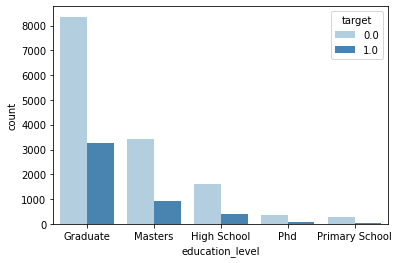

In [28]:
sns.countplot(data=df, x = 'education_level', hue='target', palette='Blues')

Here we see that the most proprtions are quite similar for each education level. There seems to be no distinguishing characteristic, so I believe that this feature will not be necessary for the model.

# Major Discipline

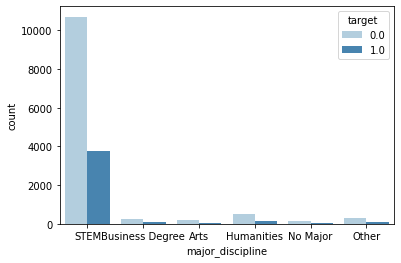

In [31]:
sns.countplot(data=df, x = 'major_discipline', hue='target', palette='Blues')

Analysis: 
Here we see that that STEM is the dominating major which is normal as Comp Sci and Mathematics are some of the most common majors for Data Science. I do not believe that this category will be very influential as all the other majors are so minute and follow the same trend as STEM anyways.

# Experience

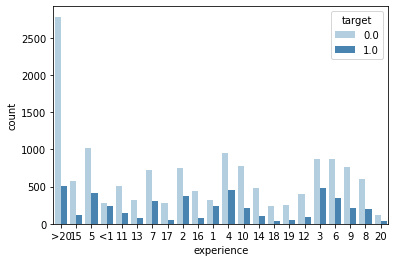

In [32]:
sns.countplot(data=df, x = 'experience', hue='target', palette='Blues')

This category does not seem to be very important as they all seem to follow same proportions.

# Company Size

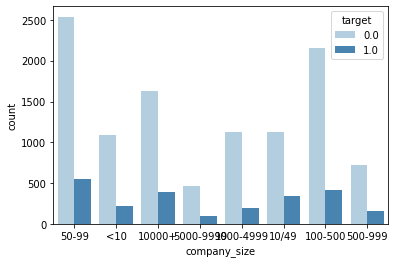

In [33]:
sns.countplot(data=df, x = 'company_size', hue='target', palette='Blues')

This category does not seem to be very important as they all seem to follow same proportions.


# Company Type

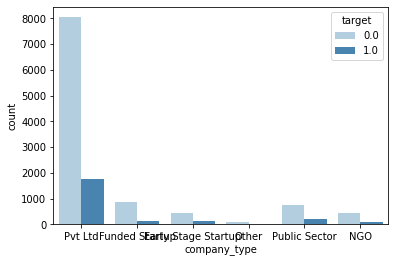

In [34]:
sns.countplot(data=df, x = 'company_type', hue='target', palette='Blues')

This category does not seem to be very important as they all seem to follow same proportions.


# Last New Job

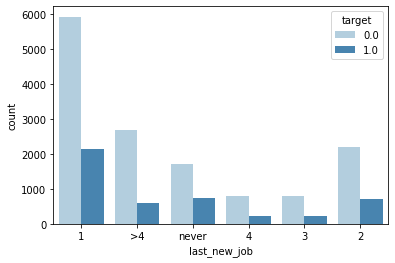

In [35]:
sns.countplot(data=df, x = 'last_new_job', hue='target', palette='Blues')

This category does not seem to be very important as they all seem to follow same proportions.


# Training Hours

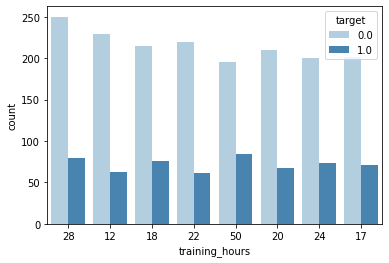

In [39]:
sns.countplot(data=df, x = 'training_hours', hue='target', palette='Blues', order=df.training_hours.value_counts().iloc[:8].index)

This category does not seem to be very important as they all seem to follow same proportions.
